In [11]:
# 오류 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd

pcos = pd.read_csv('../Data/pcos_stepwise.csv')
pcos.head(3)

,PCOS,Age,Pulse rate,Cycle length,aborptions,Weight gain,hair growth,Skin darkening,Pimples,Fast food
0,0.0,28.0,78.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,36.0,74.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,33.0,72.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터가 1이나 0 으로만 이루어 지지 않은 칼럼들만 산점도를 찍어보았다.

In [14]:
pcos_range = pcos[['PCOS','Age','Pulse rate','Cycle length']]
pcos_range.head(3)

,PCOS,Age,Pulse rate,Cycle length
0,0.0,28.0,78.0,5.0
1,0.0,36.0,74.0,5.0
2,1.0,33.0,72.0,5.0


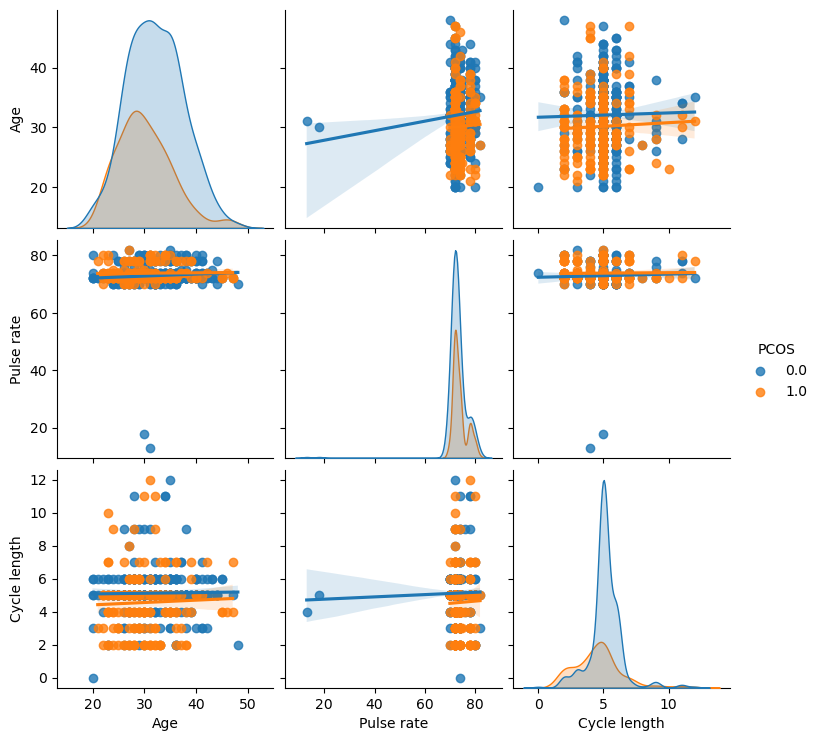

In [21]:
sns.pairplot(pcos_range, hue='PCOS',kind='reg')
plt.show()

### 이상치를 확인하기 위해 boxplot 찍어보기

'Age','Pulse rate','Cycle length'

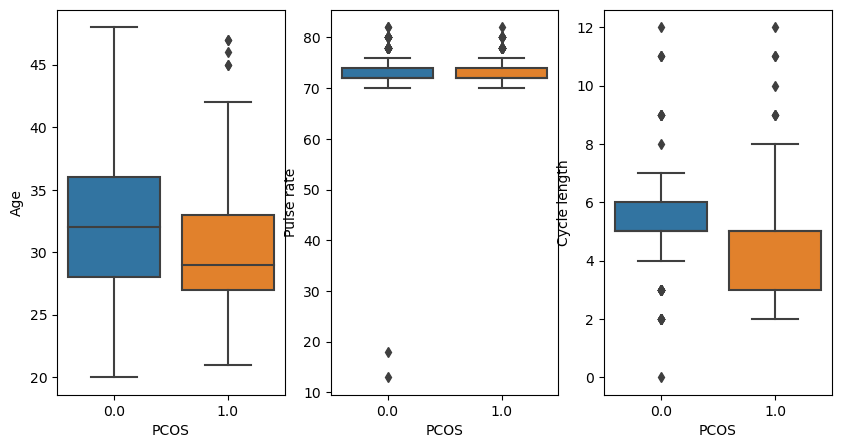

In [16]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)




sns.boxplot(
    data=pcos_range,
    x = 'PCOS',
    y = 'Age',
    ax=ax1,
)

sns.boxplot(
    data=pcos_range,
    x = 'PCOS',
    y = 'Pulse rate',
    ax=ax2,
)
sns.boxplot(
    data=pcos_range,
    x = 'PCOS',
    y = 'Cycle length',
    ax=ax3,
)
plt.show()

### 이상치를 발견하여 제거하도록 한다

### Age는 데이터 특성상 나이가 많다고 해서 이상치가 아니다. Pulse rate의 경우 비정상적으로 낮은 2개의 이상치가 보여 제거한다.

In [17]:
pcos['Pulse rate'].sort_values(ascending=1)

296    13.0
223    18.0
455    70.0
147    70.0
359    70.0
       ... 
221    80.0
540    80.0
212    82.0
381    82.0
444    82.0
Name: Pulse rate, Length: 541, dtype: float64

In [18]:
pcos.drop([296,223], inplace=True)
pcos['Pulse rate'].sort_values(ascending=1)

455    70.0
147    70.0
359    70.0
72     70.0
269    70.0
       ... 
221    80.0
540    80.0
212    82.0
381    82.0
444    82.0
Name: Pulse rate, Length: 539, dtype: float64

### 이상치 제거 후 Boxplot 다시 찍어보기

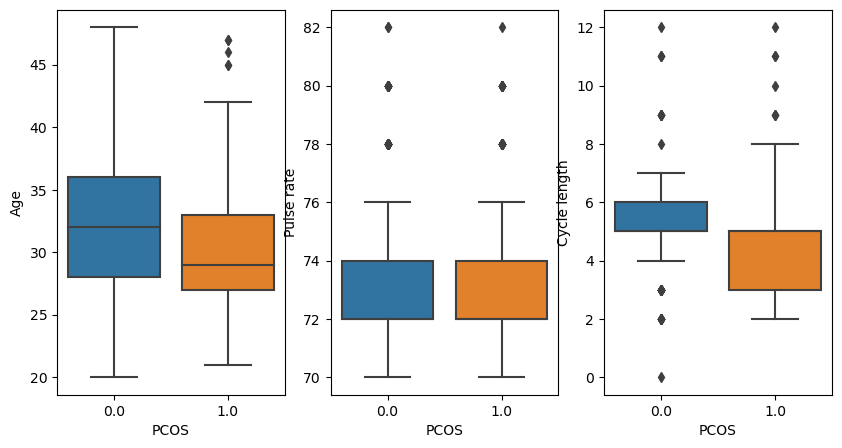

In [19]:

pcos_range_remove = pcos[['PCOS','Age','Pulse rate','Cycle length']]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)




sns.boxplot(
    data=pcos_range_remove,
    x = 'PCOS',
    y = 'Age',
    ax=ax1,
)

sns.boxplot(
    data=pcos_range_remove,
    x = 'PCOS',
    y = 'Pulse rate',
    ax=ax2,
)
sns.boxplot(
    data=pcos_range_remove,
    x = 'PCOS',
    y = 'Cycle length',
    ax=ax3,
)
plt.show()

### 각 Feature column마다 PCOS와 그래프 그려보기

In [25]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [27]:
pcos.columns.unique()

Index(['PCOS', 'Age', 'Pulse rate', 'Cycle length', 'aborptions',
       'Weight gain', 'hair growth', 'Skin darkening', 'Pimples', 'Fast food'],
      dtype='object')

### Y or N로 구분되어 지는 칼럼들을 파이차트를 통해 PCOS 비율을 알아보자.

In [48]:
pcos_YN = pcos[['PCOS','aborptions','Weight gain','hair growth','Skin darkening','Pimples','Fast food']]
pcos_YN.head()

,PCOS,aborptions,Weight gain,hair growth,Skin darkening,Pimples,Fast food
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


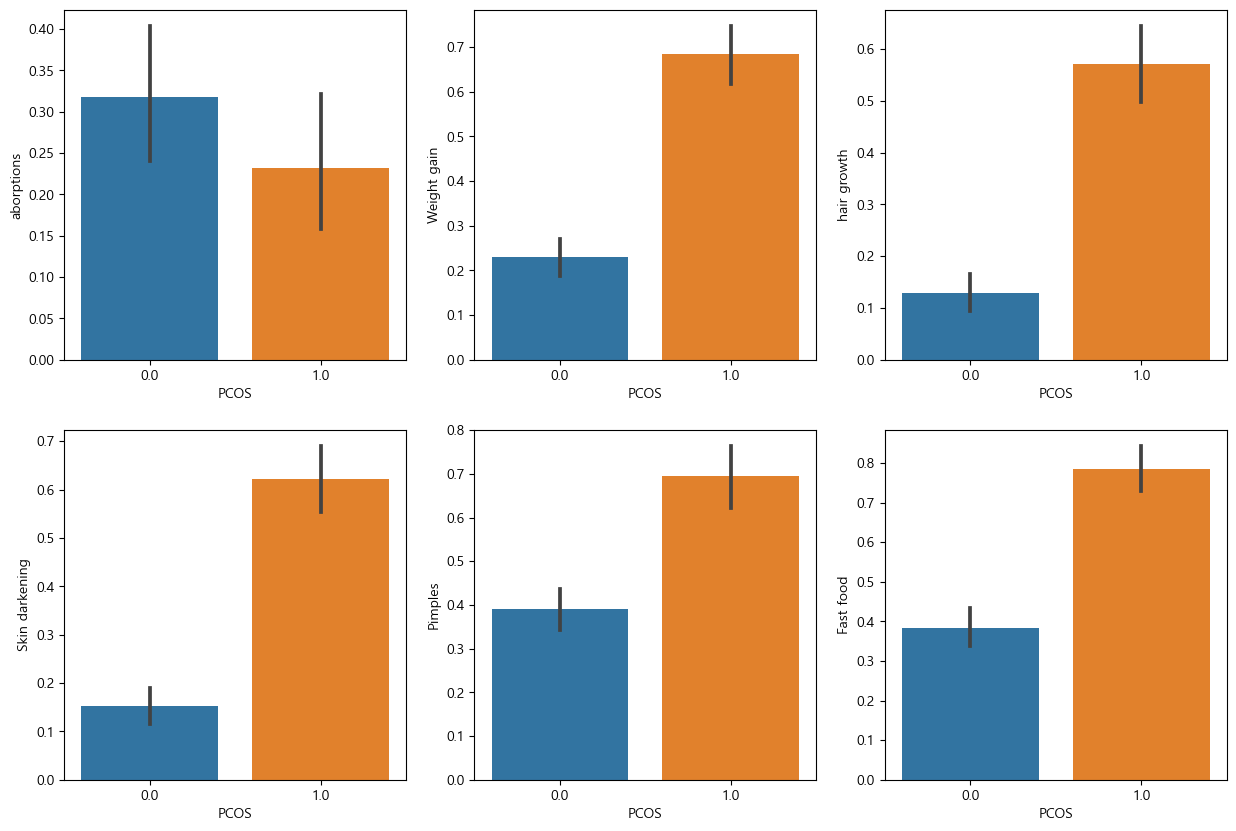

In [63]:

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

sns.barplot(
    x='PCOS',
    y='aborptions',
    data=pcos_YN,
    ax=ax1
)
sns.barplot(
    x='PCOS',
    y='Weight gain',
    data=pcos_YN,
    ax=ax2
)
sns.barplot(
    x='PCOS',
    y='hair growth',
    data=pcos_YN,
    ax=ax3
)
sns.barplot(
    x='PCOS',
    y='Skin darkening',
    data=pcos_YN,
    ax=ax4
)
sns.barplot(
    x='PCOS',
    y='Pimples',
    data=pcos_YN,
    ax=ax5
)
sns.barplot(
    x='PCOS',
    y='Fast food',
    data=pcos_YN,
    ax=ax6
)

plt.show()

### 각 칼럼마다 PCOS Y/N 비율이 다르므로 Feature Column으로 괜찮다는 것을 알 수 있다.

### 나머지 column들은 Swarm plot으로 확인해보기

In [69]:
pcos_range = pcos[['PCOS', 'Age', 'Pulse rate', 'Cycle length']]
pcos_range.head(3)

,PCOS,Age,Pulse rate,Cycle length
0,0.0,28.0,78.0,5.0
1,0.0,36.0,74.0,5.0
2,1.0,33.0,72.0,5.0


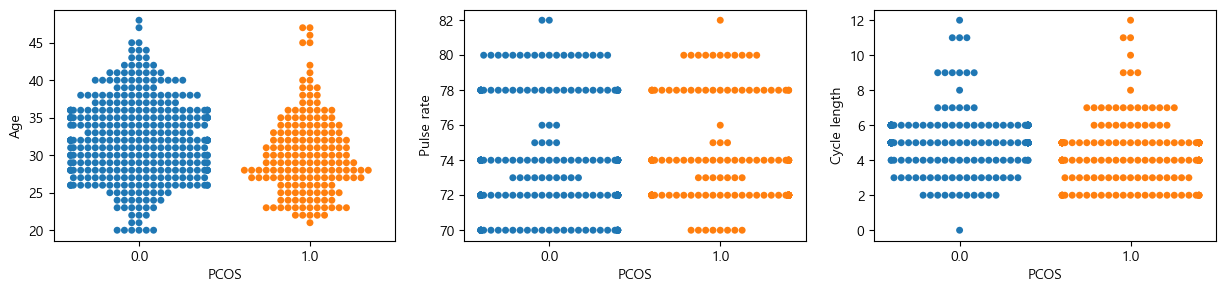

In [74]:
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


sns.swarmplot(
    x = 'PCOS',
    y = 'Age',
    data = pcos_range,
    ax=ax1
    
)
sns.swarmplot(
    x = 'PCOS',
    y = 'Pulse rate',
    data = pcos_range,
    ax=ax2
    
)
sns.swarmplot(
    x = 'PCOS',
    y = 'Cycle length',
    data = pcos_range,
    ax=ax3
    
)

plt.show()

### swarm plot으로 찍어 본 결과 분포 모양이 다르므로 Feature column으로 괜찮다는 것을 알 수 있다.

## 데이터 저장하기

In [77]:
pcos.to_csv('../Data/pcos_remove.csv',index=None)